<a href="https://colab.research.google.com/github/DebarajPurohit/Telco_churn_prediction/blob/main/telco_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Find the churn function of the Telecom company

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import math

from sklearn import metrics
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Almabetter/Module 4: MACHINE LEARNING/Logistic Regression/WA_Fn-UseC_-Telco-Customer-Churn.csv")
print ("Dataset size")
print("Rows {} Columns {}".format(data.shape[0], data.shape[1]))

Dataset size
Rows 7043 Columns 21


In [4]:
print("Columns and data types")
pd.DataFrame(data.dtypes).rename(columns = {0:'dtype'})

Columns and data types


,dtype
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [5]:
# Create a copy of original dataframe data
df = data.copy()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


We will only consider Monthly_charges and Tenure for our prediction

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


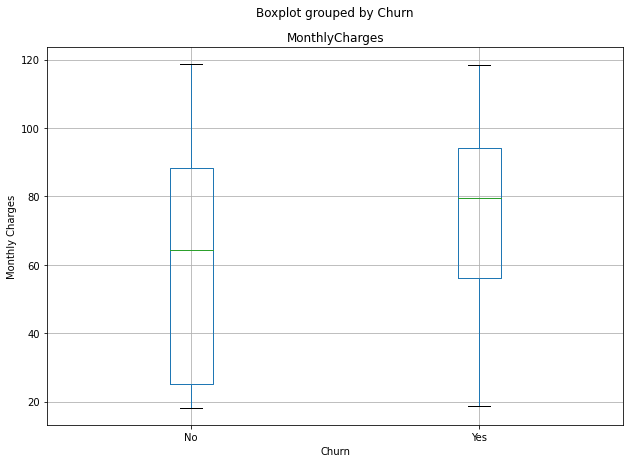

In [8]:
fig = plt.figure(figsize = (10,7))
ax = fig.gca()
df.boxplot(column = 'MonthlyCharges', by= 'Churn', ax=ax)
ax.set_ylabel("Monthly Charges")
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


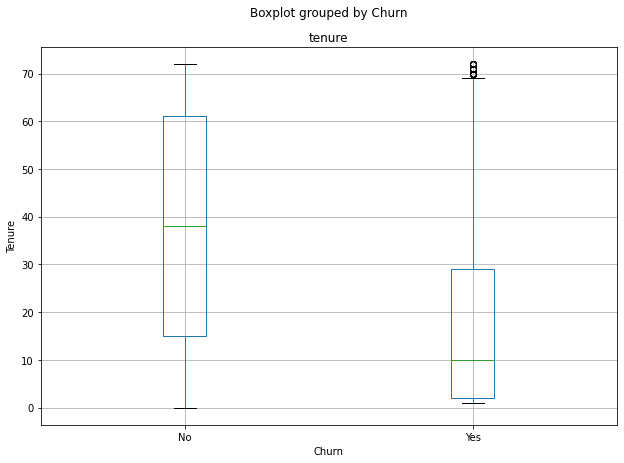

In [10]:
fig = plt.figure(figsize = (10,7))
ax = fig.gca()
df.boxplot(column = 'tenure', by = 'Churn', ax=ax)
ax.set_ylabel("Tenure")
plt.show()

Convert churn feature from string YES/NO to int 0/1

In [15]:
df['class']= df['Churn'].apply(lambda x: 1 if x =="Yes" else 0)
# Features will be saved as x and our target will be saved as Y
x = df[['tenure','MonthlyCharges']].copy()
y = df['class'].copy()

In [16]:
x

,tenure,MonthlyCharges
0,1,29.85
1,34,56.95
2,2,53.85
3,45,42.30
4,2,70.70
...,...,...
7038,24,84.80
7039,72,103.20
7040,11,29.60
7041,4,74.40


In [17]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: class, Length: 7043, dtype: int64

Splitting into train_test_split

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size= 0.2, random_state=0)

In [20]:
print(X_train.shape)

(5634, 2)


In [21]:
print(X_test.shape)

(1409, 2)


In [22]:
y_train.value_counts()

0    4133
1    1501
Name: class, dtype: int64

In [24]:
y_test.value_counts()

0    1041
1     368
Name: class, dtype: int64

In [26]:
# Fitting logistic regression on train data
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(fit_intercept = True, max_iter = 10000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [27]:
clf.coef_

array([[-0.05646728,  0.03315385]])

In [28]:
clf.intercept_

array([-1.77408975])

In [40]:
# Evaluating the trained model
train_preds = clf.predict_proba(X_train)[:,1]

In [41]:
train_preds

array([0.04660412, 0.26348159, 0.00693396, ..., 0.0126016 , 0.61820209,
       0.2102166 ])

In [39]:
train_model.shape

(5634,)

In [42]:
test_preds= clf.predict_proba(X_test)[:,1]

In [43]:
test_preds

array([0.2854851 , 0.21477359, 0.46935224, ..., 0.22711321, 0.28381889,
       0.42259962])

In [44]:
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [46]:
test_class_preds

array([0, 0, 0, ..., 0, 0, 0])

In [47]:
train_class_preds

array([0, 0, 0, ..., 0, 1, 0])

In [48]:
# Get Accuracy Scores
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
train_accuracy = accuracy_score(train_class_preds, y_train)
test_accuracy = accuracy_score(test_class_preds, y_test)

In [49]:
print("Accuracy on train class data is ", train_accuracy)
print("Accuracy on test class data is ", test_accuracy)

Accuracy on train class data is  0.7857649982250621
Accuracy on test class data is  0.7735982966643009


[[3745  388]
 [ 819  682]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

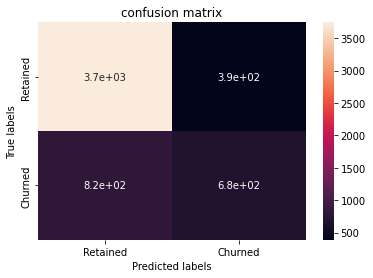

In [51]:
# Get the confusion matrix for both train ad test data
labels = ['Retained','Churned']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)
ax = plt.subplot()
sns.heatmap(cm,annot = True, ax= ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('confusion matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[934 107]
 [212 156]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

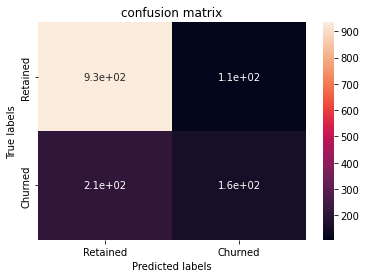

In [53]:
cm = confusion_matrix(y_test, test_class_preds)
print(cm)
ax=plt.subplot()
sns.heatmap(cm, annot = True, ax= ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('confusion matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)


# Implementing cross validation

In [55]:
from sklearn.model_selection import cross_validate
logistic = LogisticRegression()
scoring = ['accuracy']
scores = cross_validate(logistic, X_train, y_train, scoring = scoring, cv=5, return_train_score = True, return_estimator= True, verbose = 10)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.785, test=0.789) total time=   0.0s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.787, test=0.791) total time=   0.0s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.788, test=0.771) total time=   0.0s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.789, test=0.775) total time=   0.0s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.781, test=0.806) total time=   0.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished


In [56]:
scores['train_accuracy']

array([0.78500111, 0.78677613, 0.78788551, 0.78877302, 0.78127773])

In [58]:
scores['test_accuracy']

array([0.78881988, 0.79148181, 0.77107365, 0.77462289, 0.80639432])

In [59]:
scores['estimator']

[LogisticRegression(),
 LogisticRegression(),
 LogisticRegression(),
 LogisticRegression(),
 LogisticRegression()]